# Investigating some basic properties

In [1]:
from sqlalchemy import create_engine
from getpass import getpass, getuser
from os import listdir
from os.path import join
from pprint import pprint

import pandas as pd

pd.set_option('display.max_columns', None)

%matplotlib inline

In [2]:
# Reading in data

# NOTE: If you want access, let me know, and I'll give you a username and password and you'd also want local to be false

def get_residential_df(table='complete_residential', local=True):
    """Returns the df that I'll be using to study features"""
    u = input('Database user:')
    p = getpass('Input database password')
    if local:
        url = '10.0.1.4'
    else:
        url = 'handelstaccato.homenet.org'
    engine_string = 'postgresql://{0}:{1}@{2}:5432/king_county'.format(u, p, url)
    engine = create_engine(engine_string)
    residential_q = (
        'SELECT * FROM project."{}";'.format(table)
    )
    return pd.read_sql(residential_q, engine)

parcel = get_residential_df(local=False)

Database user:gavin
Input database password········


In [ ]:
# Make sale data a date

In [3]:
# Data basics
# A lot of possibly useful features

parcel.head()

,Major,Minor,PropType,Area,DistrictName,ParcSqFtLot,CurrentZoning,Topography,StreetSurface,InadequateParking,PcntUnusable,MtRainier,Olympics,Cascades,SeattleSkyline,PugetSound,LakeWashington,LakeSammamish,LotDepthFactor,TrafficNoise,AirportNoise,PowerLines,HistoricSite,SteepSlopeHazard,WaterProblems,SqFtTotLiving,sale_date,sale_price,sale_reason,appr_land_val,appr_imprv_val,appr_tot_val,major_str,minor_str,pin,addr_full,landmarks_counts100,landmarks_counts1000,landmarks_counts20000,light_rail_counts100,light_rail_counts1000,light_rail_counts20000,parks_counts100,parks_counts1000,parks_counts20000,priv_school_counts100,priv_school_counts1000,priv_school_counts20000,pub_school_counts100,pub_school_counts1000,pub_school_counts20000
0,343850,2083,R,18.0,SEATTLE,5000,SF 5000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,N,0,N,N,2060,02/11/2014,295783,3,123000,234000,357000,343850,2083,3438502083,6343 23RD AVE SW,0,0,34,0,0,5,0,0,72,0,0,0,0,0,1
1,286460,50,R,11.0,SEATTLE,6150,SF 5000,1,1,0,0,0,0,2,0,0,0,0,0,0,0,N,0,N,N,2200,10/11/2011,275500,8,396000,403000,799000,286460,0050,2864600050,3200 37TH AVE W,0,0,127,0,0,0,0,0,90,0,0,1,0,0,0
2,864810,60,R,86.0,COVINGTON,8165,R4,0,1,2,0,0,0,0,0,0,0,0,0,0,0,N,0,N,N,1610,04/20/2007,339950,1,101000,173000,274000,864810,0060,8648100060,26516 201ST CT SE,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,312203,9050,R,100.0,KING COUNTY,181645,RA10SO,0,1,2,0,0,0,0,0,0,0,0,0,0,0,N,0,N,N,1360,11/18/1994,0,18,139000,245000,384000,312203,9050,3122039050,28021 99TH AVE SW,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,762620,133,R,16.0,SEATTLE,9250,SF 5000,1,1,2,0,0,0,0,0,0,0,0,0,0,0,N,0,N,N,1280,06/19/1987,105000,1,258000,297000,555000,762620,0133,7626200133,6655 BEVERIDGE PL SW,0,0,31,0,0,0,0,0,56,0,0,0,0,0,1


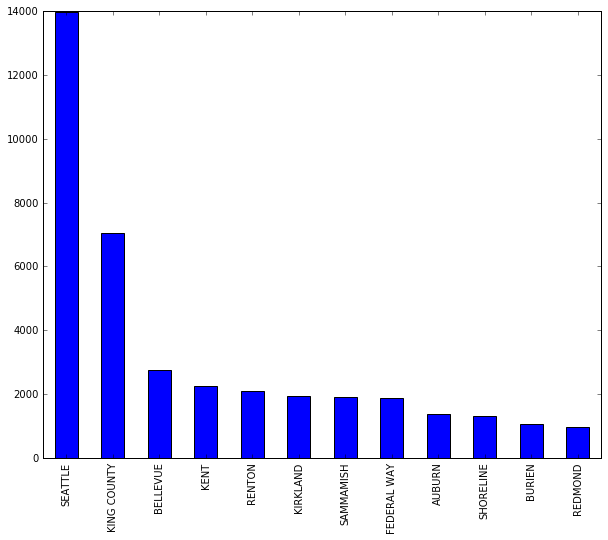

In [4]:
# Which districts are represented?

parcel.DistrictName.value_counts().head(12).plot(kind='bar', figsize=(10,8))

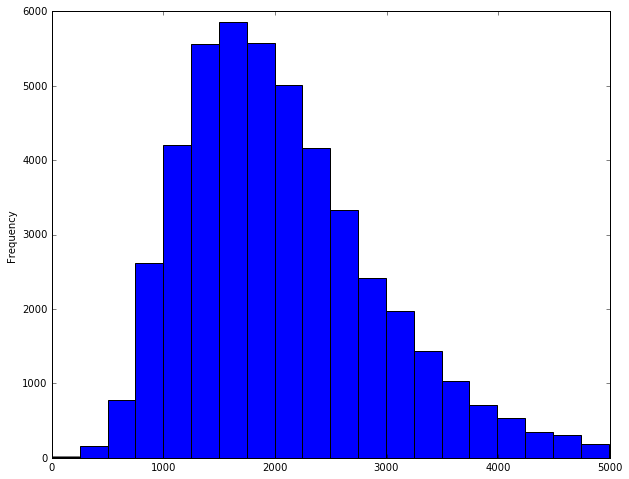

In [5]:
# How many square feet?

parcel.loc[parcel.SqFtTotLiving < 5000, 'SqFtTotLiving'].plot(kind='hist', bins=20, figsize=(10, 8))

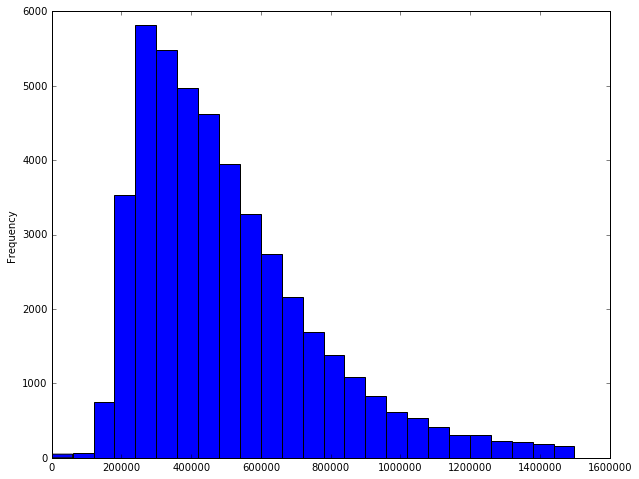

In [6]:
parcel.loc[parcel.appr_tot_val < 1500000, 'appr_tot_val'].plot(kind='hist', figsize=(10, 8), bins=25)

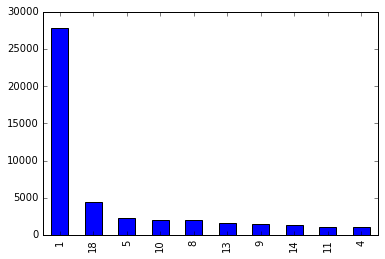

In [7]:
parcel.sale_reason.value_counts().head(10).plot(kind='bar')

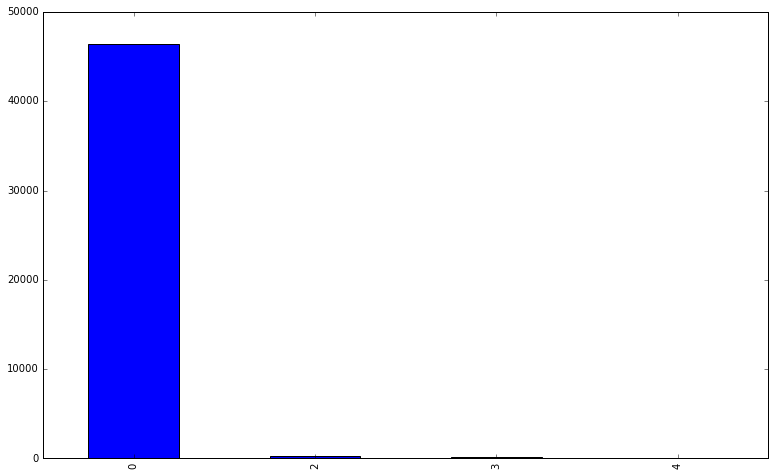

In [8]:
parcel.SeattleSkyline.value_counts().plot(kind='bar', figsize=(13,8))

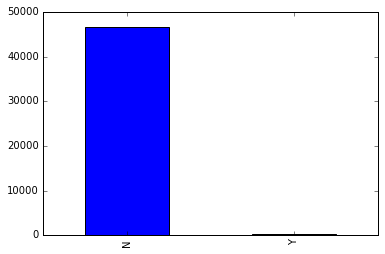

In [9]:
parcel.WaterProblems.value_counts().plot(kind='bar')

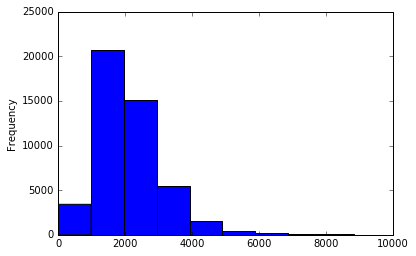

In [10]:
parcel.loc[parcel.SqFtTotLiving < 10000, 'SqFtTotLiving'].plot(kind='hist')

In [11]:
# Review what we have

for col in parcel.columns:
    dtype = parcel[col].dtype
    print(col, dtype, end='\n')
    if dtype in ['object', 'int64']:
        pprint(parcel[col].unique())
    print('\n')

Major int64
array([343850, 286460, 864810, ..., 948577, 564700, 115880])


Minor int64
array([2083,   50,   60, ..., 2618, 1428, 8435])


PropType object
array(['R'], dtype=object)


Area float64


DistrictName object
array(['SEATTLE', 'COVINGTON', 'KING COUNTY', 'BOTHELL', 'SHORELINE',
       'SAMMAMISH', 'MAPLE VALLEY', 'BELLEVUE', 'FEDERAL WAY',
       'DES MOINES', 'KIRKLAND', 'REDMOND', 'ENUMCLAW', 'AUBURN',
       'ISSAQUAH', 'RENTON', 'KENMORE', 'KENT', 'BLACK DIAMOND',
       'MERCER ISLAND', 'LAKE FOREST PARK', 'BURIEN', 'TUKWILA',
       'NORTH BEND', 'MEDINA', 'ALGONA', 'NEWCASTLE', 'SNOQUALMIE',
       'WOODINVILLE', 'NORMANDY PARK', 'SeaTac', 'DUVALL', 'YARROW POINT',
       'BEAUX ARTS', 'PACIFIC', 'CLYDE HILL', 'HUNTS POINT', 'CARNATION',
       'MILTON', 'SKYKOMISH'], dtype=object)


ParcSqFtLot int64
array([  5000,   6150,   8165, ...,  35535,  28461, 304920])


CurrentZoning object
array(['SF 5000', 'R4', 'RA10SO', 'LR1', 'R 8400', 'RA5', 'R6', 'SF 7200',
       'R-6'